## Imports and Setup

In [1]:
import os
import sys

import arviz as av
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.special
import seaborn as sns

parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
if parent_dir + "examples" not in sys.path:
    sys.path.append(parent_dir + "examples")

from zusammen import DataSet
from zusammen.spectral_plot import display_posterior_model_counts

sns.set_theme(context="paper")

mpl.use("pgf")
pgf_with_latex = {
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    # "pgf.texsystem": "lualatex",
    "pgf.preamble": "\n".join([
        r"\usepackage{siunitx}",
        r"\DeclareSIUnit{\erg}{erg}"
        ])
    }
mpl.rcParams.update(pgf_with_latex)

width = 455

21:09:49 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=490898;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=533652;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=973865;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=180182;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=49457;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=709258;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=126716;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=990146;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=150676;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=239009;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=986851;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=395160;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=734143;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=567681;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=992855;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=500836;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=271199;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=866314;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

21:09:50 INFO      Starting 3ML!                                                                     ]8;id=492504;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=925368;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=447462;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=114230;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=213990;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=849090;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=614579;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=752197;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   no display variable set. using backend for graphics without display (agg)         ]8;id=628734;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=665263;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py#46\46]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=216538;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=909926;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=134380;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=834080;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=773669;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=119030;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

21:09:50 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=857425;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=644300;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=668829;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=276917;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=453857;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=389741;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=855430;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=746869;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=575184;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=928534;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=340160;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=485887;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=746915;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=563480;file:///opt/homebrew/Caskroom/miniconda/base/envs/bachelor/lib/python3.8/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

#### Set size

In [ ]:
def pt_to_inch(pt):
    return pt / 72.27

def set_size(width_pt, fraction=1, subplots=(1, 1), height=None):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure height in inches
    if not height:
        fig_height_in = pt_to_inch(fig_width_pt) * golden_ratio * (subplots[0] / subplots[1])
    else:
        fig_height_in = pt_to_inch(height)

    return (pt_to_inch(fig_width_pt), fig_height_in)

## Band function

In [ ]:
def band(E, Ec, piv, K, alpha, beta):
    ret = np.zeros(E.shape)
    for i, e in enumerate(E):
        if e < (alpha - beta) * Ec:
            ret[i] = K * (e / piv)**alpha * np.exp(-e / Ec)
        else:
            ret[i] = K * ((alpha - beta) * Ec / piv)**(alpha - beta) * np.exp(beta - alpha) * (e / piv)**beta
    return ret

In [ ]:
K = 10
alpha = -1
beta = -2.2
Ec = 1
piv = .1
x1 = 1e-2
x2 = 1e2

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=set_size(width, height=270, subplots=(2,1)), height_ratios=(3,2))

E = np.logspace(np.log(x1), np.log(x2), 100)
ax1.plot(E, K * (E / piv)**alpha * np.exp(-E / Ec), "b--")
ax1.plot(E, band(E, Ec, piv, K, alpha, beta), "b")

ax1.loglog()
ax1.set_xlim(x1, x2)
ax1.set_ylim(1.5e-6, 1e3)

ax1.text(.98,.88, 'a)', horizontalalignment='right', transform=ax1.transAxes, bbox={"boxstyle": "square", "facecolor": ax1.get_facecolor(), "edgecolor": "gray"})
ax1.set_ylabel(r"$B$ [$\si{\per\second\per\centi\meter\squared\per\mega\electronvolt}$]")


ax2.plot(E, K * 1.602e-6 * E**2 * (E / piv)**alpha * np.exp(-E / Ec), "b--")
ax2.plot(E, 1.602e-6 * E**2 * band(E, Ec, piv, K, alpha, beta), "b")

ax2.loglog()
ax2.set_ylim(8e-9,2e-6)
ax2.text(.98,.82, 'b)', horizontalalignment='right', transform=ax2.transAxes, bbox={"boxstyle": "square", "facecolor": ax2.get_facecolor(), "edgecolor": "gray"})
ax2.set_xlabel(r"Photon Energy $E_\gamma$ $[\si{\mega\electronvolt}]$")
ax2.set_ylabel(r"$E_\gamma^2 B$ [$\si{\erg\per\second\per\centi\meter\squared}$]")


fig.align_ylabels([ax1,ax2])
fig.tight_layout()
# fig.savefig("band.pgf")

## Arviz

### Load the data

In [2]:
ds = DataSet.from_hdf5_file("../examples/sgrb.h5")
data = ds.to_stan_dict()

In [3]:
res = av.from_netcdf("../examples/inference_data/testing_gc_relaxed.nc")

In [23]:
N_intervals = data["N_intervals"]
N_grbs = data["N_grbs"]
length = res.posterior.gamma.shape[0] * res.posterior.gamma.shape[1]
chains = res.posterior.gamma.shape[0]
draws = res.posterior.gamma.shape[1]

alpha = np.zeros((N_intervals, length))
log_ec = np.zeros((N_intervals, length))
K_prime = np.zeros((N_intervals, length))
K= np.zeros((N_intervals, length))
log_energy_flux = np.zeros((N_intervals, length))
log_epeak = np.zeros((N_intervals, length))
gamma = np.zeros((N_grbs, length))
log_Nrest = np.zeros((N_grbs, length))
div = np.zeros((N_intervals, length))
samples = np.zeros((N_intervals, 3, length))
z = data["z"]
dl = data["dl"]
# dl = []

for id in range(N_intervals):
    alpha[id] = res.posterior.alpha.stack(sample=("chain", "draw")).values[id]

    log_ec[id] = res.posterior.log_ec.stack(sample=("chain", "draw")).values[id]
    K[id] = res.posterior.K.stack(sample=("chain", "draw")).values[id]

    log_epeak[id] = res.posterior.log_epeak.stack(sample=("chain", "draw")).values[id]
    log_energy_flux[id] = res.posterior.log_energy_flux.stack(sample=("chain", "draw")).values[id]

for id in range(N_grbs):
    gamma[id] = res.posterior.gamma.stack(sample=("chain", "draw")).values[id]
    log_Nrest[id] = res.posterior.log_Nrest.stack(sample=("chain", "draw")).values[id]

# gamma_mu_meta = res.posterior.gamma_mu_meta.stack(sample=("chain", "draw")).values
# log_Nrest_mu_meta = res.posterior.log_Nrest_mu_meta.stack(sample=("chain", "draw")).values

In [ ]:
res.posterior.alpha.values.shape

### Summary
$2 \sigma$

In [ ]:
av.summary(res, hdi_prob=.91)

$ 3 \sigma $

In [ ]:
av.summary(res, hdi_prob=.34)

### Plots

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
av.plot_kde(gamma, ax=ax)
ax.set_xlim(1.377,1.545)
ax.set_ylim(-.5,35)
ax.set_xlabel(r"$\mu_{\gamma}$")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
av.plot_kde(gamma_mu_meta, ax=ax)
ax.set_xlim(1.377,1.545)
ax.set_ylim(0,35)
ax.set_xlabel(r"$\mu_{\log N_\mathrm{rest}}$")

In [ ]:
%matplotlib widget

fig, ax = plt.subplots(1, 1, figsize=set_size(width))
av.plot_kde(np.mean(log_epeak,1)[0:14], np.mean(log_energy_flux,1)[0:14], ax=ax)
ax.plot([1.35, 2.4], 52 - (1.099 + 2 * np.log10(9.463778818025031e+27)) + 1.5 * (np.log10(1 + 0.5276686915008358) + np.array([1.35, 2.4]) - 2), "b--")
ax.set_xlim(1.375,2.375)
ax.set_ylim(-5.7,-4.2)
ax.set_xlabel(r"$\log E_\mathrm{peak}$")
ax.set_ylabel(r"log F")

### Posterior Predictive Checks

In [18]:
def cpl(E, K, ec, alpha):
    return K * (E / ec)**alpha * np.exp(-E / ec)

def ggrb_int_cpl(alpha, ec, a, b):
    i1 = scipy.special.gammaincc(2.0 + alpha, a / ec) * scipy.special.gamma(2.0 + alpha)
    i2 = scipy.special.gammaincc(2.0 + alpha, b / ec) * scipy.special.gamma(2.0 + alpha)
    return -ec * ec * (i2 - i1)

def integral_flux(ebounds_lo, ebounds_hi, K, ec, alpha):
    ebounds_add = (ebounds_hi - ebounds_lo) / 6
    ebounds_half = (ebounds_hi + ebounds_lo) / 2
    return ebounds_add * (
        cpl(ebounds_lo, K, ec, alpha)
        + 4 * cpl(ebounds_half, K, ec, alpha)
        + cpl(ebounds_hi, K, ec, alpha)
    )

In [19]:
def ppc(chain: int, draws: int, grb: int, interval: int, detector: int, interval_in_grb=False):
    if interval_in_grb:
        interval_final = np.where(data["grb_id"] == grb + 1)[0][interval]
    else:
        interval_final = interval
    cenergies = np.append(data["cbounds_lo"][interval_final, detector], data["cbounds_hi"][interval_final, detector, -1])


    rng = np.random.default_rng()
    rand = rng.choice(draws, size=draws, replace=False)
    ppc_alpha = np.array([alpha[interval_final][i] for i in rand])
    ppc_log_ec = np.array([log_ec[interval_final][i] for i in rand])
    ppc_log_Nrest = np.array([log_Nrest[grb][i] for i in rand])
    ppc_gamma = np.array([gamma[grb][i] for i in rand])
    ppc_z = z[grb]
    ppc_dl = dl[grb]


    ppc_log_epeak = np.log10(2 + ppc_alpha) + ppc_log_ec
    ppc_log_F = ppc_log_Nrest - (1.099 + 2 * np.log10(ppc_dl)) + ppc_gamma * (np.log10(1 + ppc_z) + ppc_log_epeak - 2)
    ppc_K = 6.24151e8 * 10**ppc_log_F / (ggrb_int_cpl(ppc_alpha, 10**ppc_log_ec, 10, 1e4))


    ppc_expected_model_counts = np.zeros((draws, data["N_chan"][interval_final,detector]))


    for s in range(draws):
        ppc_expected_model_counts[s, :data["N_chan"][interval_final,detector]] = (
            data["response"][interval_final, detector, :data["N_chan"][interval_final,detector], :data["N_echan"][interval_final,detector]] @ integral_flux(
                    data["ebounds_lo"][interval_final, detector, :data["N_echan"][interval_final, detector]],
                    data["ebounds_hi"][interval_final, detector, :data["N_echan"][interval_final, detector]],
                    ppc_K[s],
                    10**ppc_log_ec[s],
                    ppc_alpha[s]
            )
        ) * data["exposure"][interval_final,detector]


    ppc_sampled_counts = np.random.poisson(ppc_expected_model_counts)


    return cenergies, ppc_sampled_counts



def ppc_summary(ppc_sampled_counts):
    ppc_sampled_counts_mu = np.mean(ppc_sampled_counts, axis=0)
    ppc_sampled_counts_hdi_1s = np.zeros((2,ppc_sampled_counts.shape[1]))
    ppc_sampled_counts_hdi_2s = np.zeros((2,ppc_sampled_counts.shape[1]))
    for i, counts in enumerate(ppc_sampled_counts.T):
        ppc_sampled_counts_hdi_1s.T[i] = av.hdi(counts, 0.6828)
        ppc_sampled_counts_hdi_2s.T[i] = av.hdi(counts, 0.9545)
    return ppc_sampled_counts_mu, ppc_sampled_counts_hdi_1s, ppc_sampled_counts_hdi_2s


In [26]:
cenergies, ppc_sampled_counts = ppc(chain=1, draws=100, grb=0, interval=0, detector=1, interval_in_grb=True)
ppc_mu, ppc_1s, ppc_2s = ppc_summary(ppc_sampled_counts)

[]

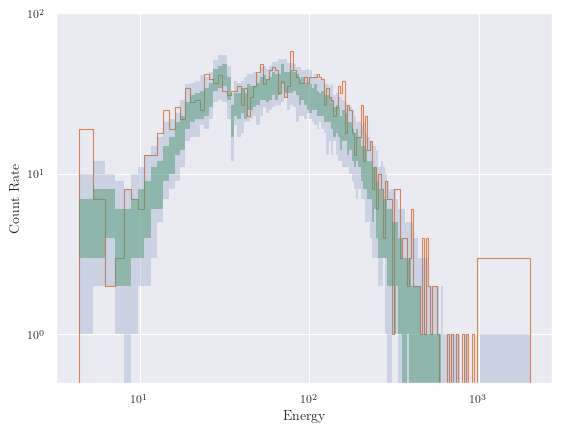

In [31]:
%matplotlib widget
plt.stairs(data["observed_counts"][0,1], cenergies, color="#dd8452")
# plt.stairs(ppc_mu, cenergies)
plt.stairs(ppc_1s[0], cenergies, baseline=ppc_1s[1], fill=True, color="#55a868", alpha=.5)
plt.stairs(ppc_2s[0], cenergies, baseline=ppc_2s[1], fill=True, color="#4c72b0", alpha=.2)

plt.ylim(.5,1e2)
plt.xlabel("Energy")
plt.ylabel("Count Rate")
plt.loglog()

In [ ]:
print(sns.color_palette().as_hex())
sns.color_palette()

In [29]:
from posterior_predictive_check import PPC
p = PPC(data, res)
cenergies, ppc_sampled_counts = p.ppc(chain=1, draws=200, grb=0, interval=0, detector=1, interval_in_grb=True)
ppc_mu, ppc_1s, ppc_2s = PPC.ppc_summary(ppc_sampled_counts)

[]

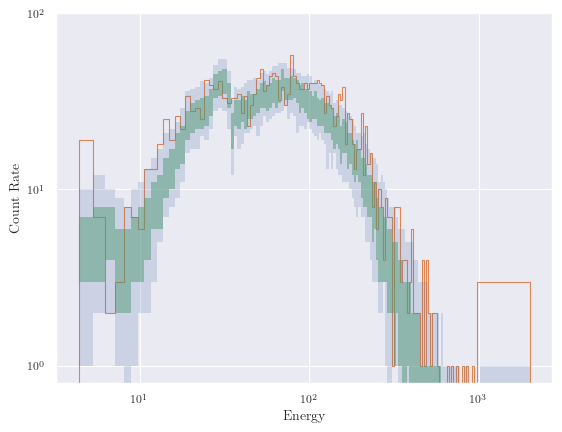

In [30]:
%matplotlib widget
plt.stairs(data["observed_counts"][0,1], cenergies, color="#dd8452")
# plt.stairs(ppc_mu, cenergies)
plt.stairs(ppc_1s[0], cenergies, baseline=ppc_1s[1], fill=True, color="#55a868", alpha=.5)
plt.stairs(ppc_2s[0], cenergies, baseline=ppc_2s[1], fill=True, color="#4c72b0", alpha=.2)

plt.ylim(.8,1e2)
plt.xlabel("Energy")
plt.ylabel("Count Rate")
plt.loglog()

In [28]:
p.K.shape

(59, 2, 500)